In [1]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pyvis
from pyvis.network import Network
import inspect

print('RDKit version: ',rdBase.rdkitVersion)
print('MatplotLib version:', mpl.__version__)
print('Pyvis version:', pyvis.__version__)


RDKit WARNING: [17:16:04] Enabling RDKit 2020.03.1dev1 jupyter extensions


RDKit version:  2020.03.1dev1
MatplotLib version: 3.1.3
Pyvis version: 0.1.7.0


#### svg drawing function

In [2]:
def moltosvg(mol,molSize=(450,250),kekulize=True):
    mc=rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    opts = drawer.drawOptions()
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

## Define input molecules

In [3]:
# flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')

## Define scaffold network parameters

In [4]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()

## try out BRICS bond breaking rules:
#params = rdScaffoldNetwork.BRICSScaffoldParams()

## try out custom bond breaking rules:
#params = rdScaffoldNetwork.ScaffoldNetworkParams(["[$([C;D3]([#0,#6,#7,#8])(=O)):1]-;!@[$([N;!D1;!$(N=*);!$(N-[!#6;!#16;!#0;!#1]);!$([N;R]@[C;R]=O)]):2]>>[1*]-[*:1].[5*]-[*:2]"])

#### print default parameter attributes

In [5]:
attributes=[a for a in inspect.getmembers(params) if not(a[0].startswith('__'))]
print('params default attributes:')
for a in attributes:
    print('{0}: {1}'.format(a[0],a[1]))


params default attributes:
flattenChirality: True
flattenIsotopes: True
flattenKeepLargest: True
includeGenericBondScaffolds: False
includeGenericScaffolds: True
includeScaffoldsWithAttachments: True
includeScaffoldsWithoutAttachments: True
keepOnlyFirstFragment: True
pruneBeforeFragmenting: True


#### customize parameter attributes

In [6]:
#params.includeGenericBondScaffolds=True
params.includeScaffoldsWithoutAttachments=False

## Create scaffold network for flucloxacillin

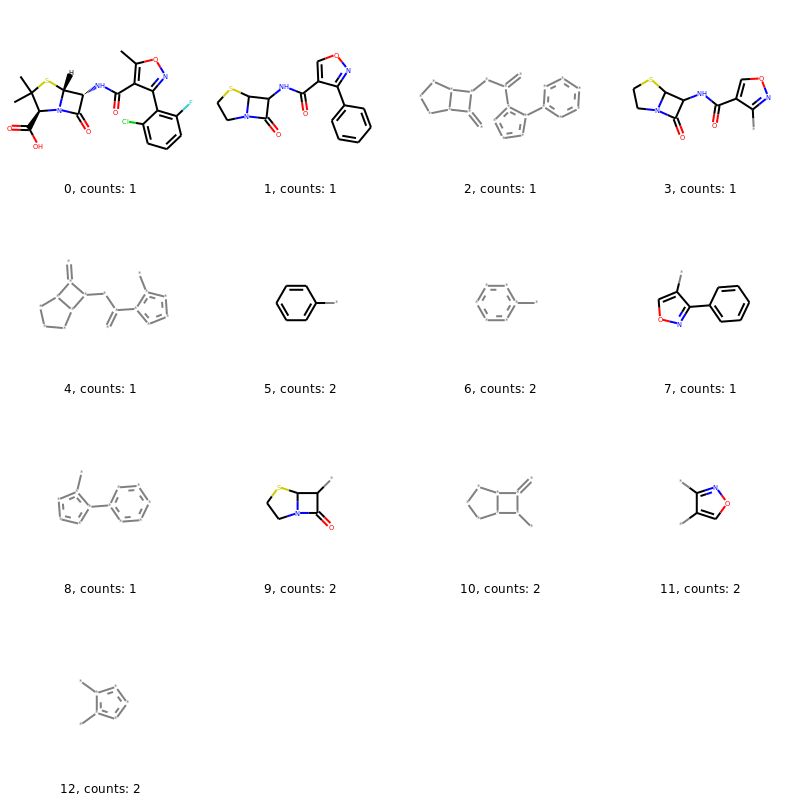

In [7]:
net = rdScaffoldNetwork.CreateScaffoldNetwork([flu],params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


In [8]:
if not os.path.isdir('./illu_net'):
    os.mkdir('./illu_net')
    
g = Network(notebook=True,height='600px',width='800px')

for i,n in enumerate(net.nodes):
    svg=moltosvg(Chem.MolFromSmiles(n))
    with open('./illu_net/{0}.svg'.format(i),'w') as outf:
        outf.write(svg)
    g.add_node(i,shape="image",label=' ',
               image ='./illu_net/{0}.svg'.format(i), title=svg, size=60)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
    
g.set_options(options="""{
  "edges": {
   "font":{
   "size":20
   }
  },
  "nodes": {
    "font": {
      "color": "rgba(214,47,66,1)",
      "size": 16,
      "face": "tahoma"
    }
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -120,
      "springLength": 200,
      "avoidOverlap": 0.42
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}""")
g.show("./scaffoldnetwork_illu_flu.html")

## Update network: Adding more molecules

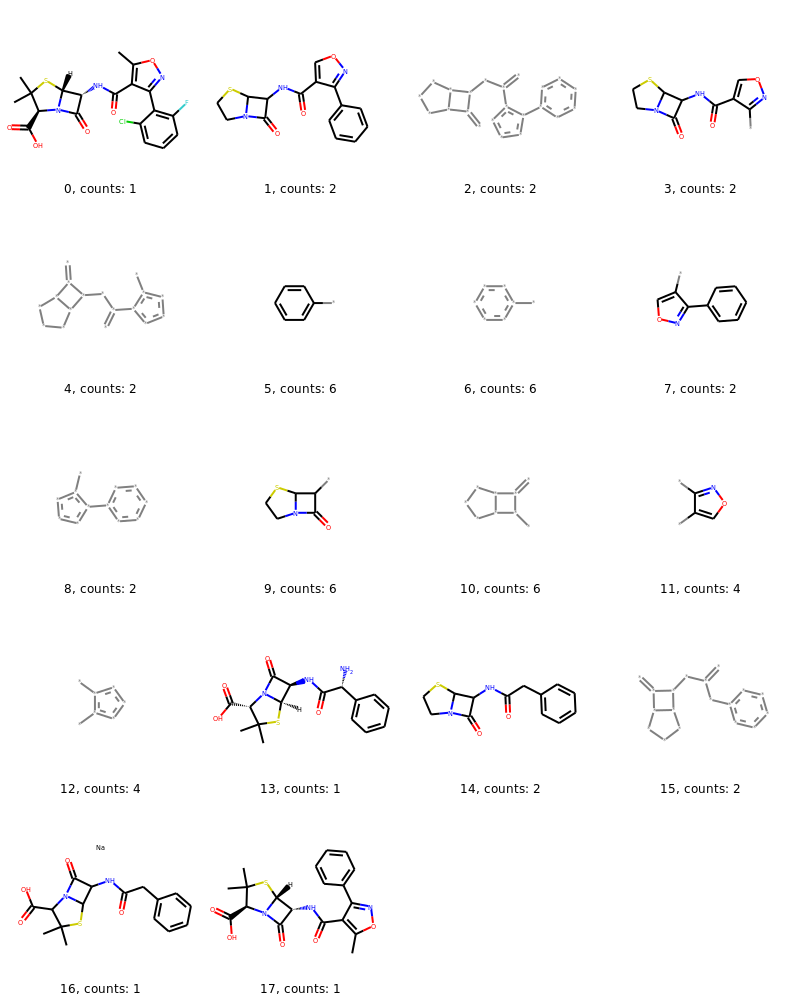

In [9]:
rdScaffoldNetwork.UpdateScaffoldNetwork([amp, pen, ox],net,params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


In [10]:
if not os.path.isdir('./illu_net'):
    os.mkdir('./illu_net')
    
g = Network(notebook=True,height='600px',width='800px')

for i,n in enumerate(net.nodes):
    svg=moltosvg(Chem.MolFromSmiles(n))
    with open('./illu_net/{0}.svg'.format(i),'w') as outf:
        outf.write(svg)
    g.add_node(i,shape="image",label=' ',
               image ='./illu_net/{0}.svg'.format(i), title=svg, size=60)
for e in net.edges:
    g.add_edge(e.beginIdx,e.endIdx,label=str(e.type))
    
g.set_options(options="""{
  "edges": {
   "font":{
   "size":20
   }
  },
  "nodes": {
    "font": {
      "color": "rgba(214,47,66,1)",
      "size": 16,
      "face": "tahoma"
    }
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -120,
      "springLength": 200,
      "avoidOverlap": 0.42
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}""")
g.show("./scaffoldnetwork_illu_antibiotics.html")